In [48]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = np.reshape(x_train, (60000, 28, 28, 1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))

In [4]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [6]:
x_train[:5]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [7]:
y_train[0]

5

In [8]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu',
                 padding="same", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu',
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

2023-11-02 14:54:04.404542: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-02 14:54:04.404889: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 256)               4

In [12]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=["accuracy"])

In [13]:
callbacks = [
    EarlyStopping(monitor="val_accuracy", patience=5,
                  restore_best_weights=True),
    ModelCheckpoint(filepath="best_model_cnn.h5",
                    monitor="val_accuracy",
                    save_best_only=True),
]

In [29]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10,
                    verbose=1, validation_split=0.1, callbacks=callbacks)

Epoch 1/10
844/844 [==============================] - 35s 40ms/step - loss: 0.1451 - accuracy: 0.9556 - val_loss: 0.0504 - val_accuracy: 0.9853
Epoch 2/10
  3/844 [..............................] - ETA: 35s - loss: 0.0826 - accuracy: 0.9792

/home/hkit/.virtualenvs/deep_learning/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


844/844 [==============================] - 34s 40ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0347 - val_accuracy: 0.9907
Epoch 3/10
844/844 [==============================] - 35s 41ms/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.0467 - val_accuracy: 0.9873
Epoch 4/10
844/844 [==============================] - 33s 39ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 5/10
844/844 [==============================] - 26s 30ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0557 - val_accuracy: 0.9833
Epoch 6/10
844/844 [==============================] - 26s 30ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0363 - val_accuracy: 0.9905
Epoch 7/10
844/844 [==============================] - 26s 30ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0318 - val_accuracy: 0.9920
Epoch 8/10
844/844 [==============================] - 26s 31ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0356 - val_accuracy: 0.9922
Epo

In [30]:
score = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.0320 - accuracy: 0.9905


In [31]:
score

[0.03196927532553673, 0.9904999732971191]

In [23]:
history.history["val_accuracy"]

[0.987666666507721,
 0.9891666769981384,
 0.9888333082199097,
 0.9898333549499512,
 0.9893333315849304]

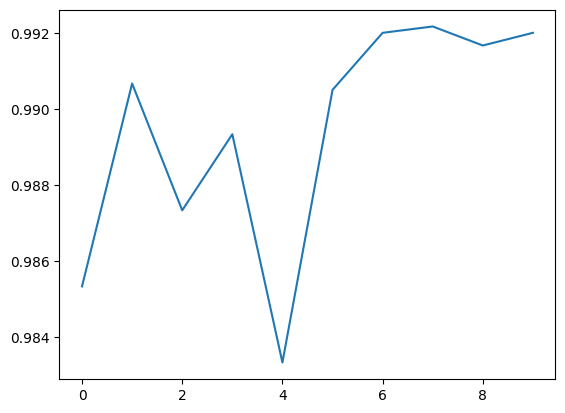

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history["val_accuracy"])

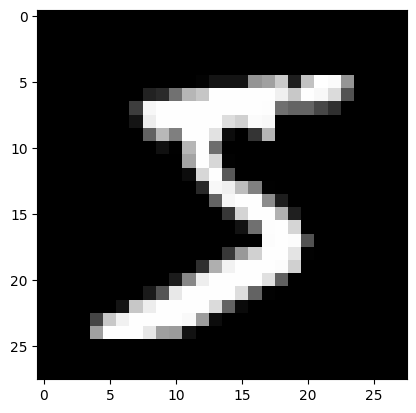

In [34]:
plt.imshow(x_train[0], cmap="Greys_r")

In [35]:
# 오답
predict = model.predict(x_train)

1875/1875 [==============================] - 9s 5ms/step


In [39]:
# 최대값의 인덱스
# argmax만 모아서 새로운 predict 생성
predict = [i.argmax() for i in predict]

In [40]:
predict[:5]

[5, 0, 4, 1, 9]

In [42]:
answer = [i.argmax() for i in y_train]

In [49]:
%pip install pandas
import pandas as pd

In [50]:
df = pd.DataFrame({"pred": predict, "ans": answer})
df.head(10)

,pred,ans
0,5,5
1,0,0
2,4,4
3,1,1
4,9,9
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


In [51]:
# df에서 pred와 ans가 다른 행만 추려줘!
df_o = df[df["pred"] != df["ans"]]

In [55]:
오답리스트 = df_o.index

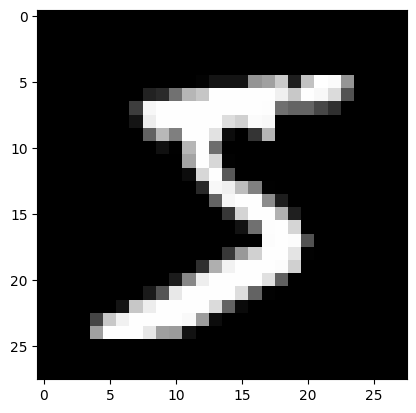

In [58]:
plt.imshow(x_train[0], cmap="Greys_r")

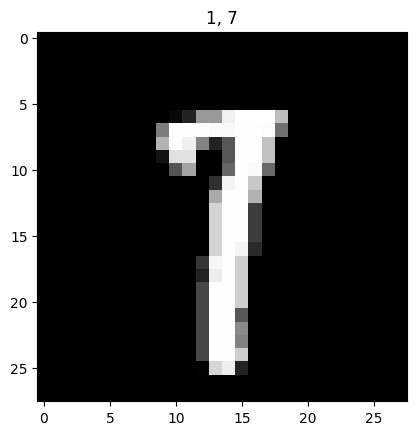

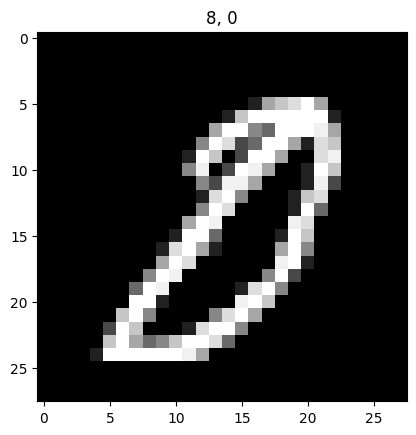

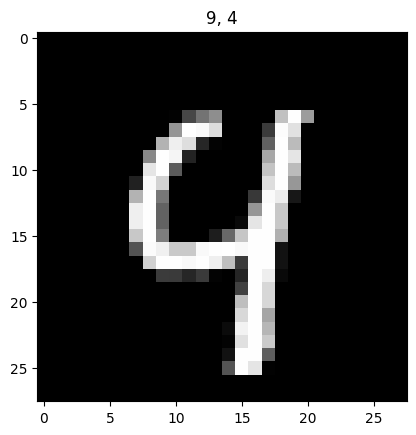

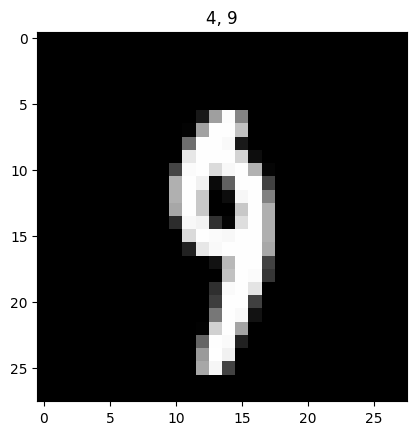

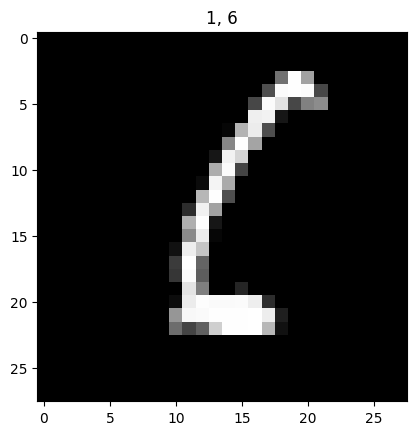

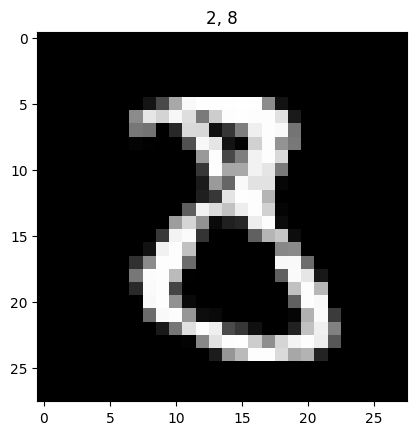

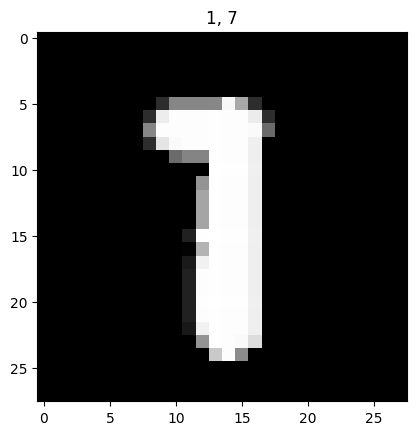

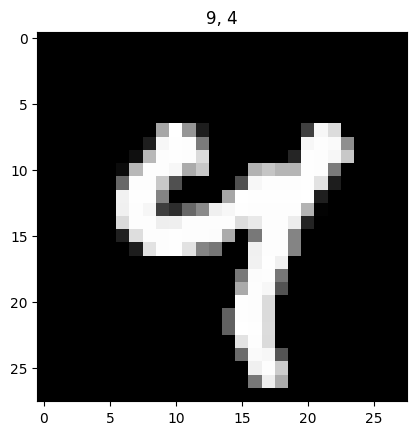

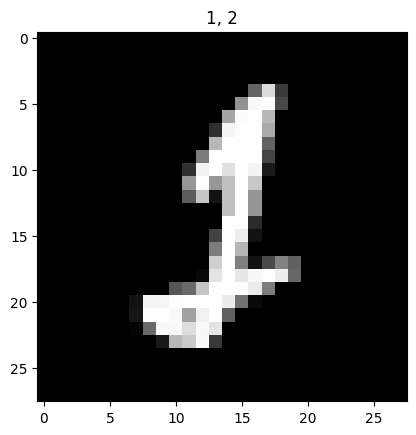

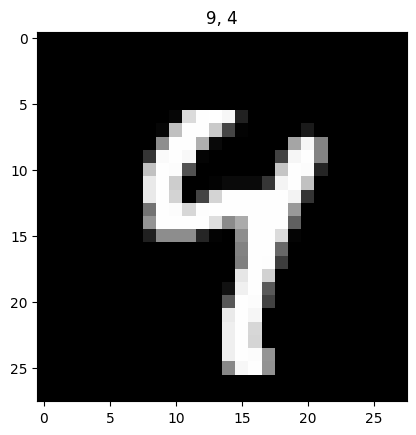

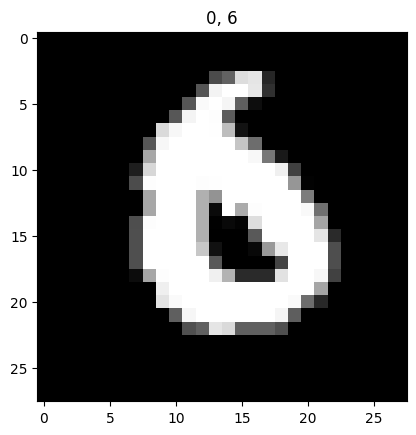

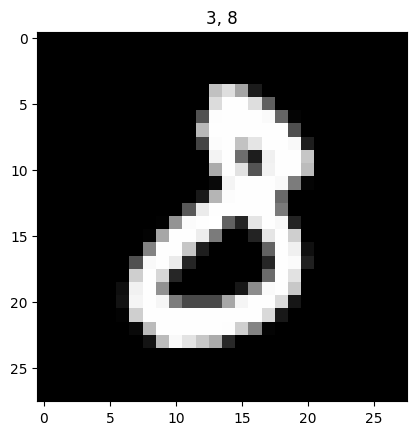

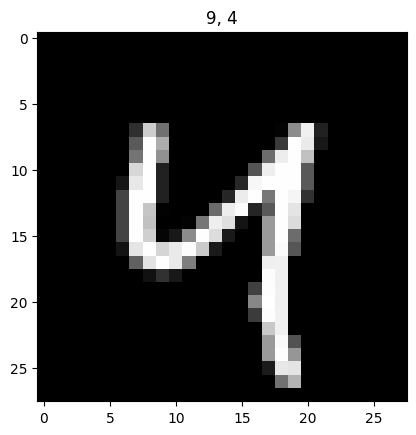

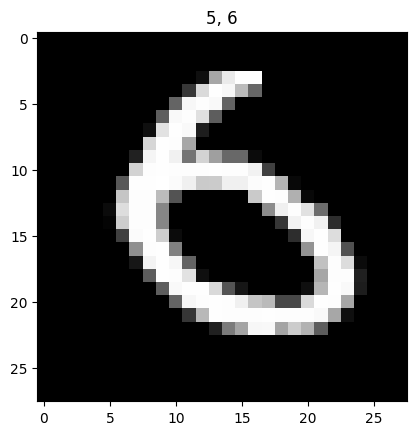

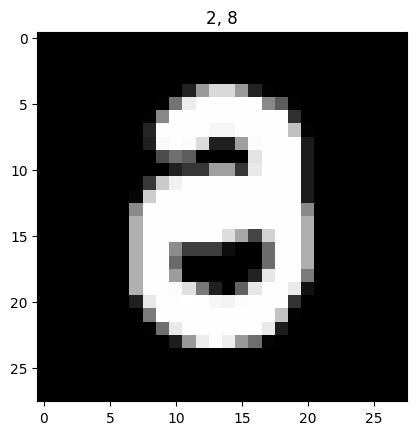

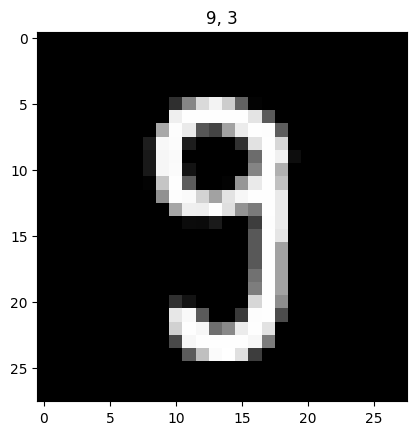

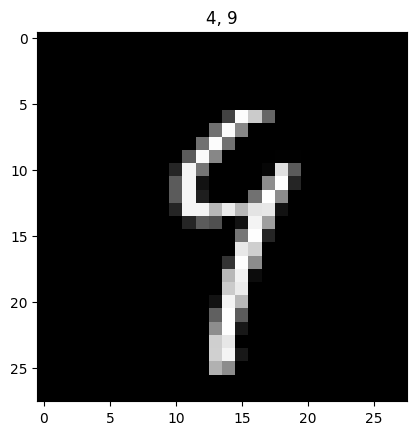

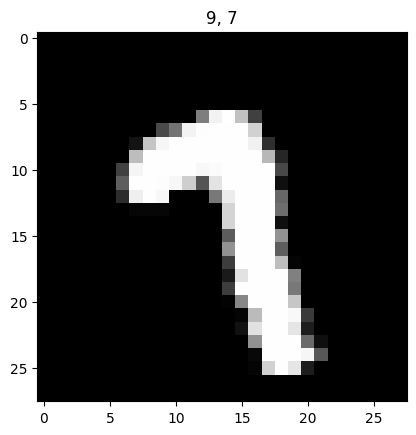

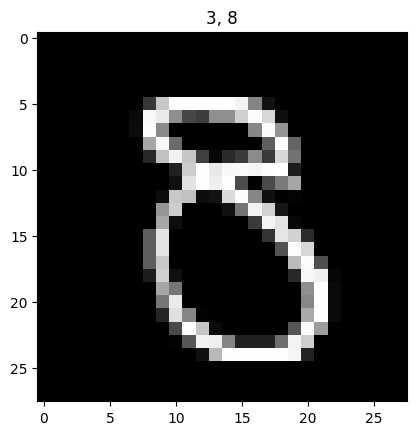

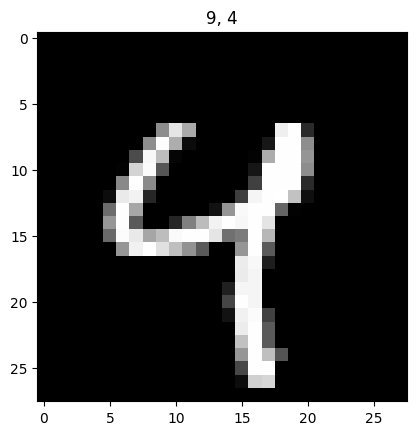

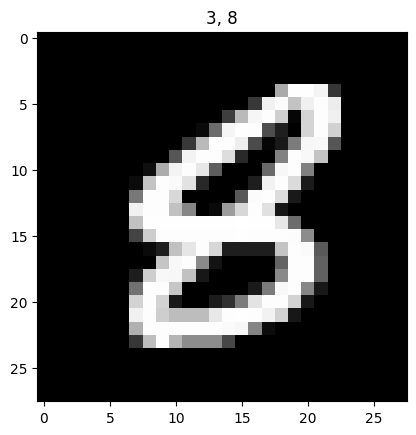

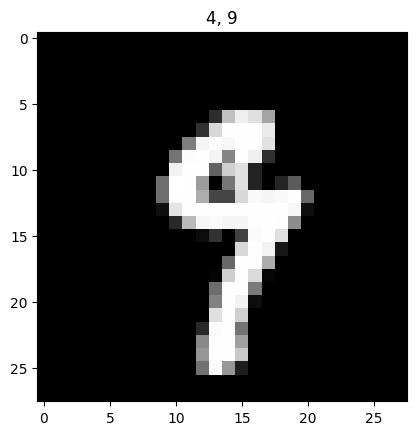

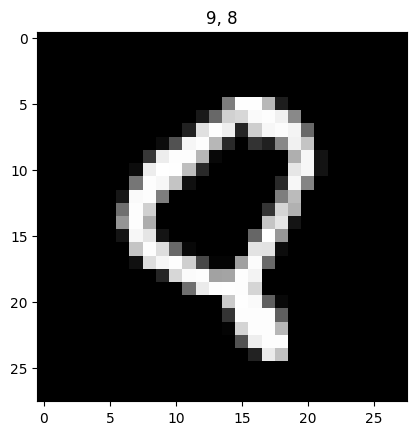

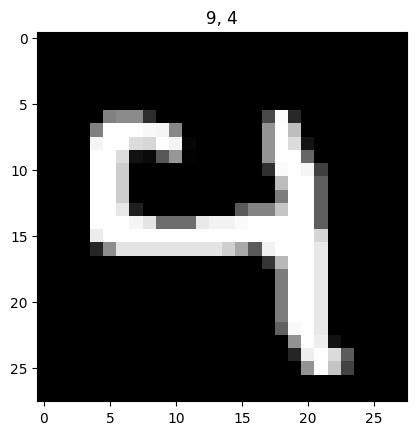

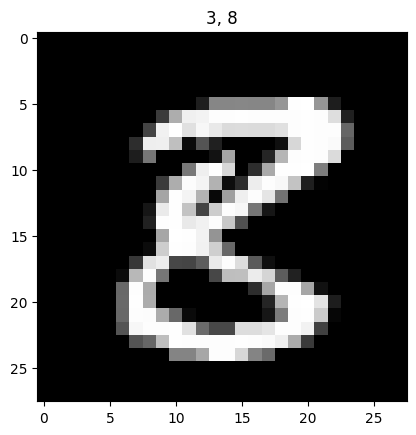

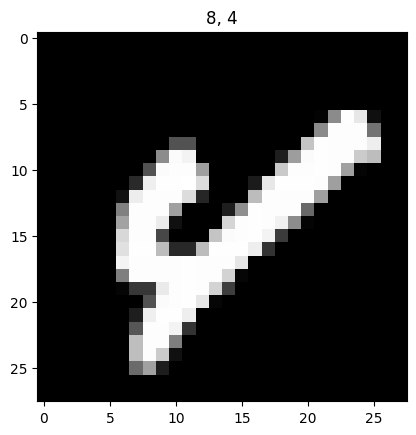

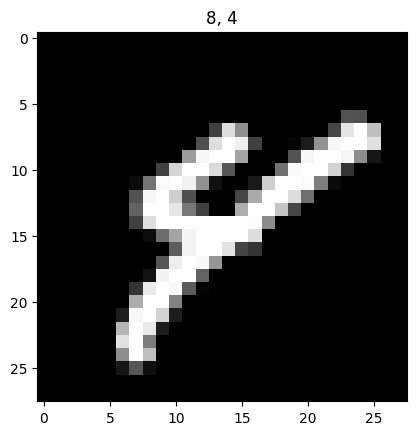

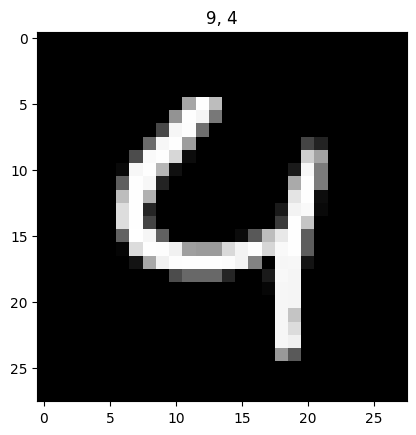

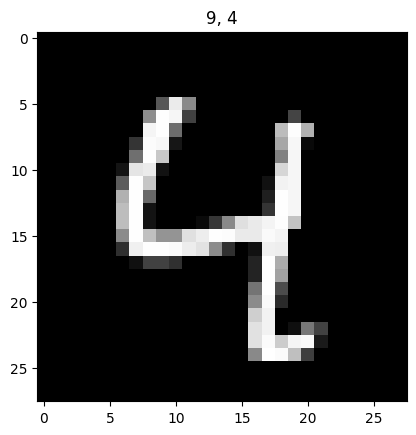

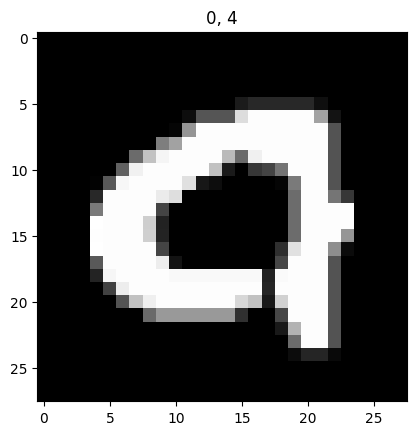

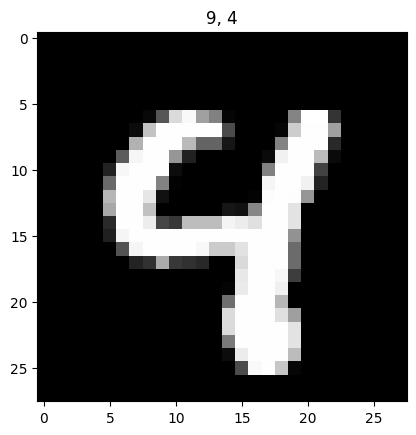

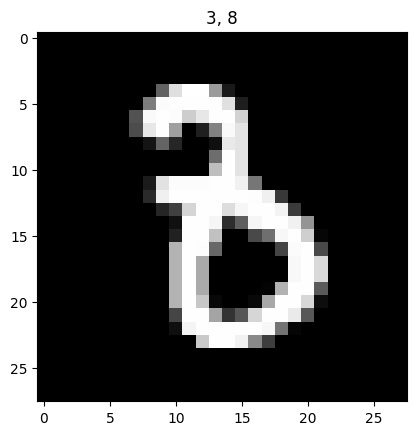

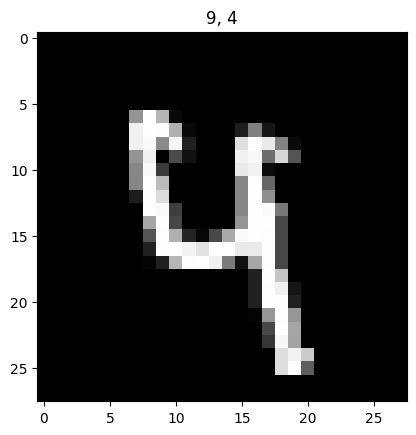

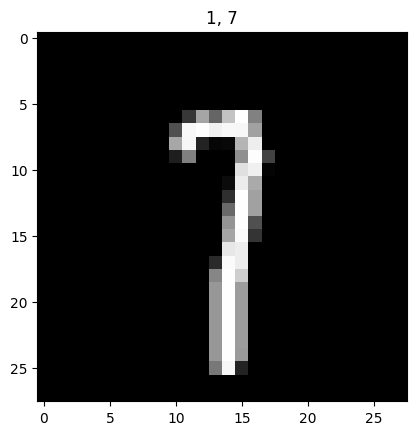

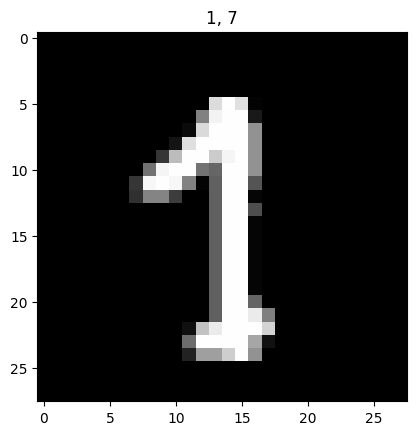

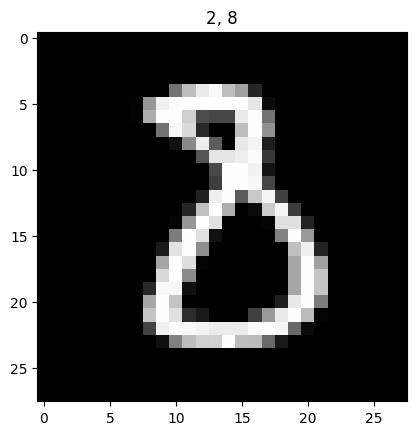

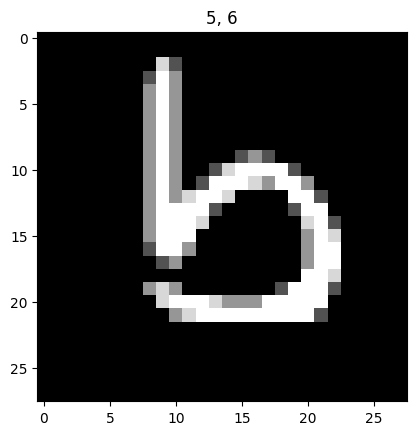

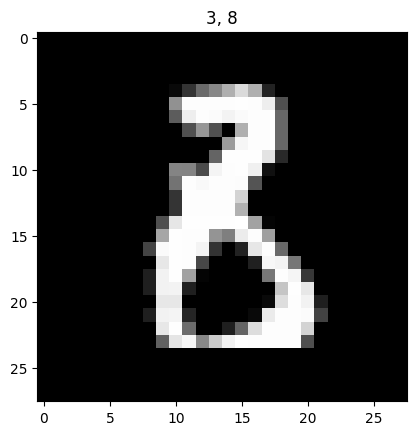

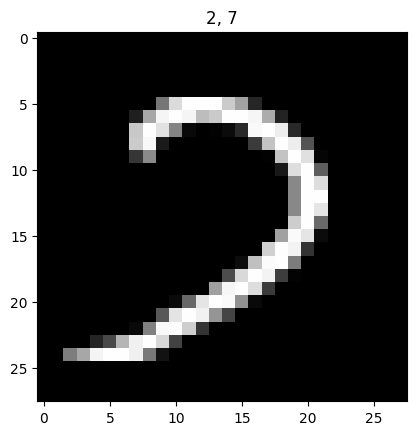

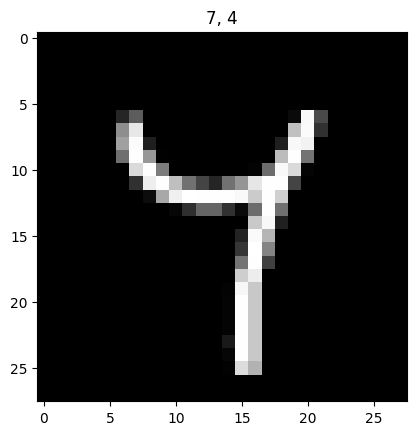

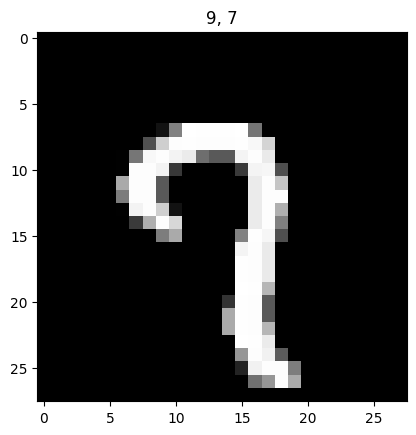

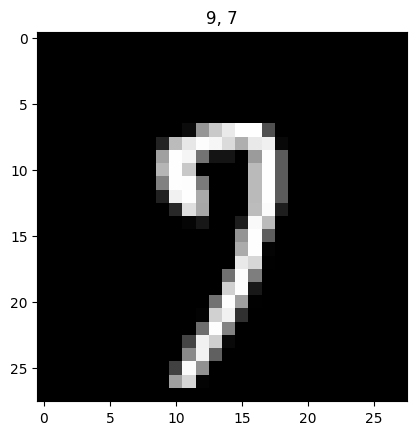

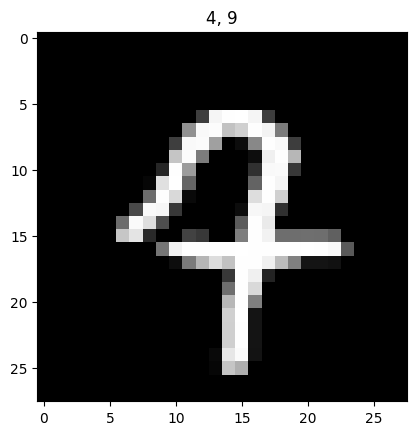

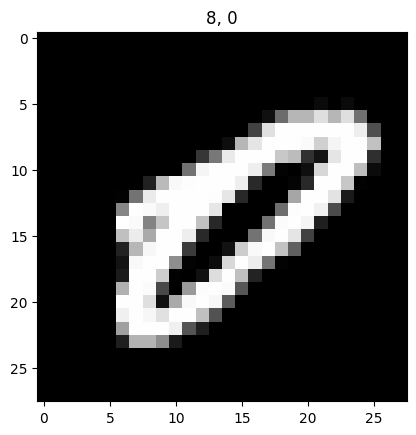

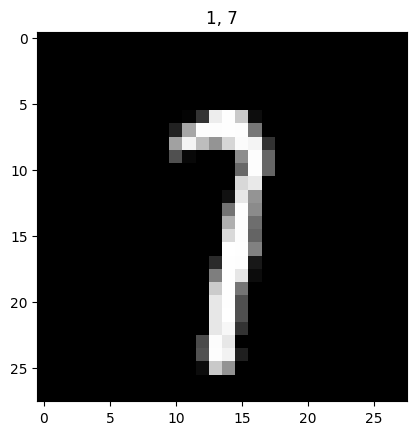

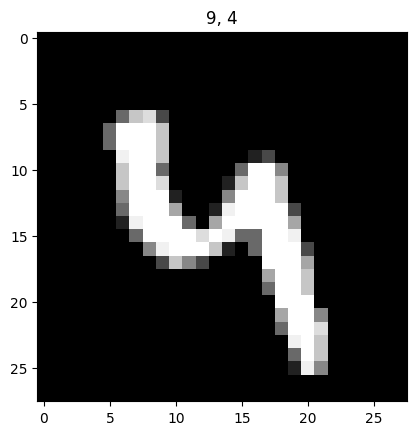

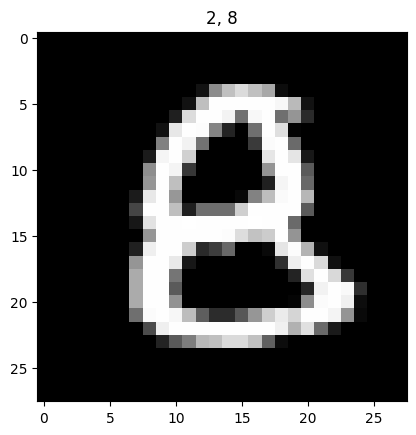

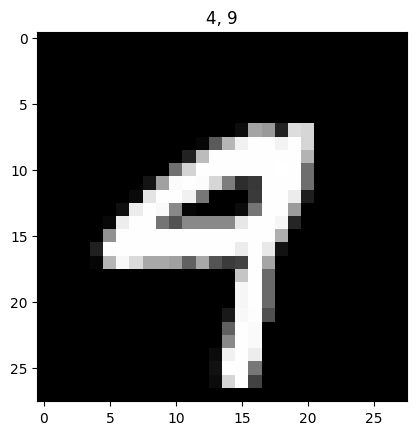

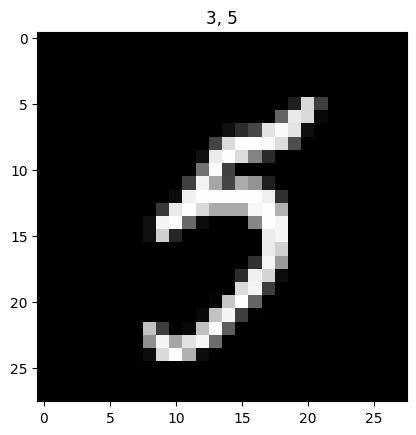

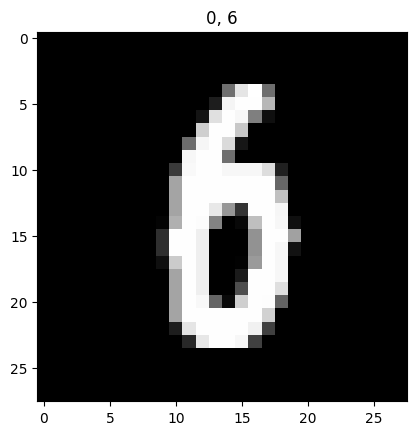

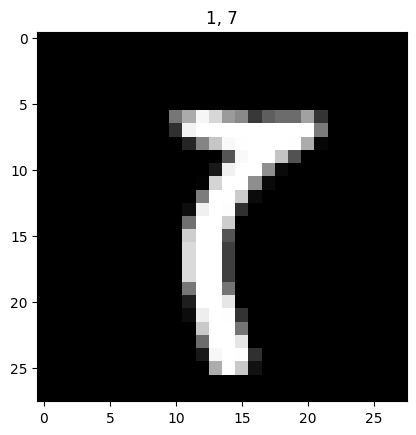

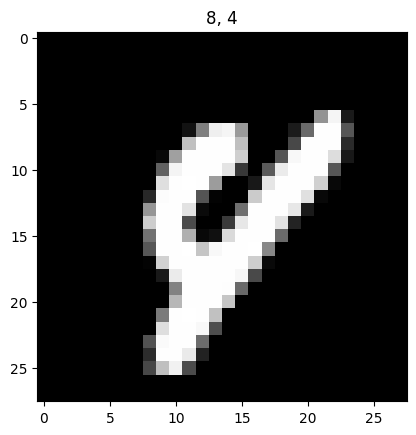

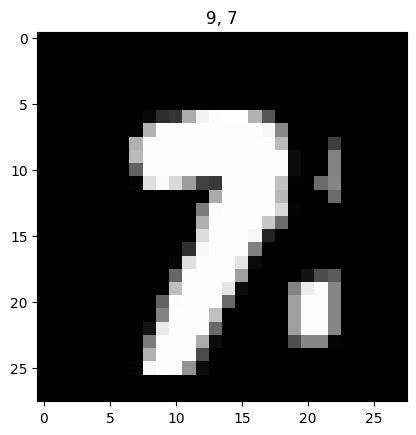

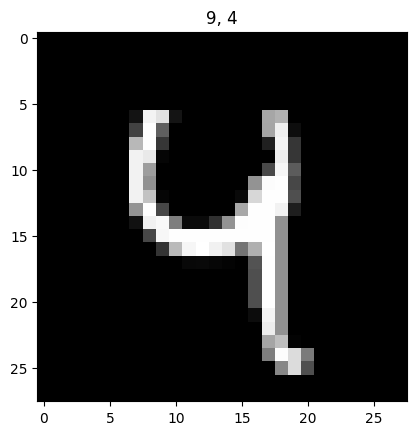

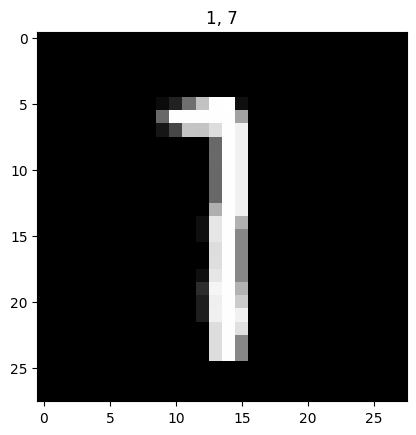

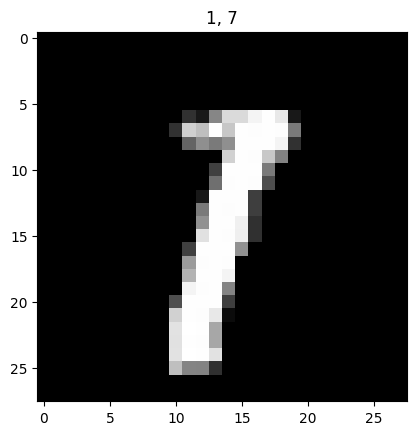

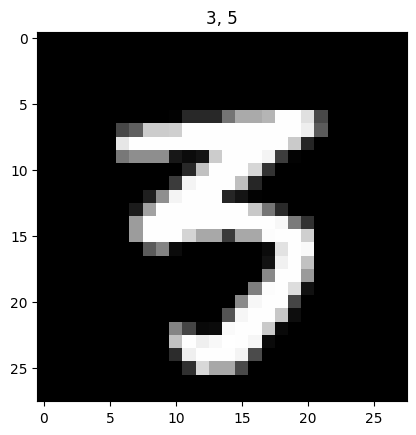

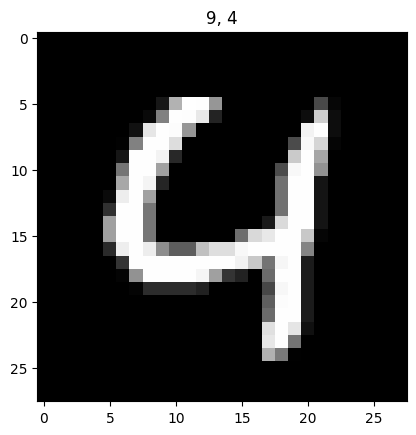

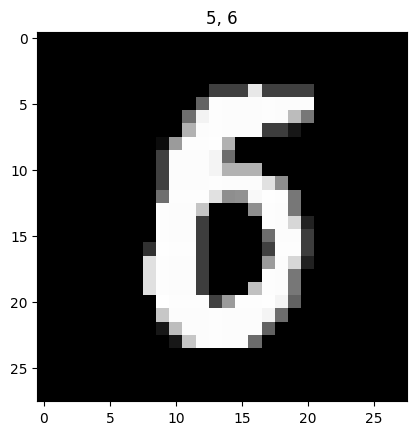

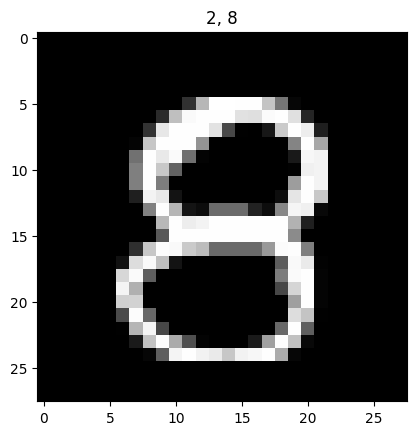

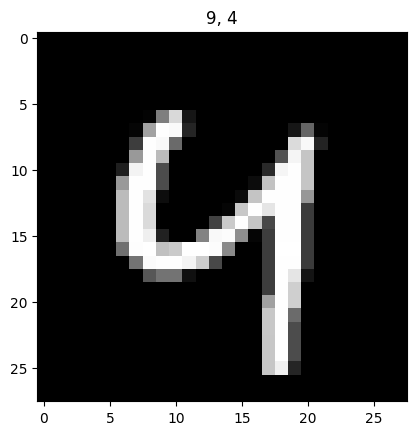

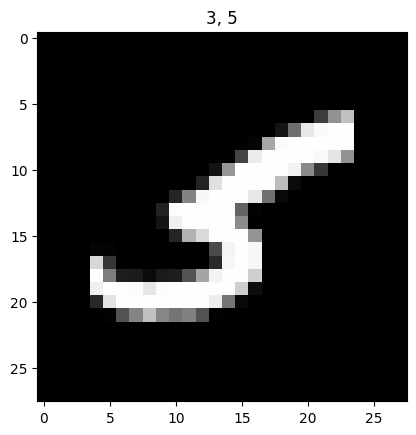

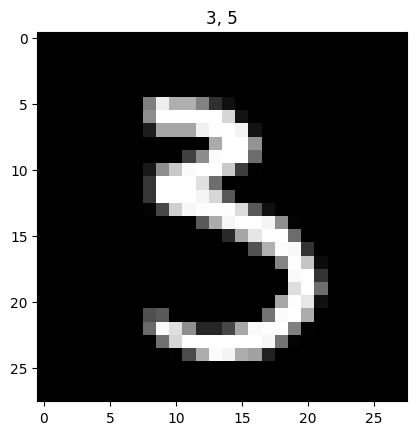

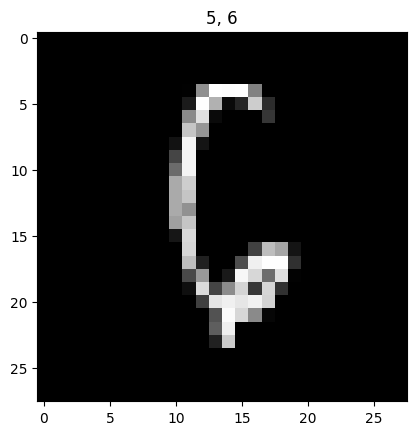

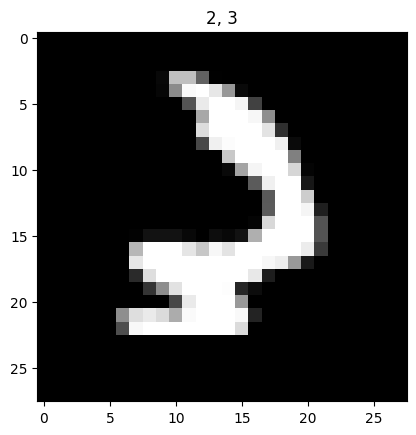

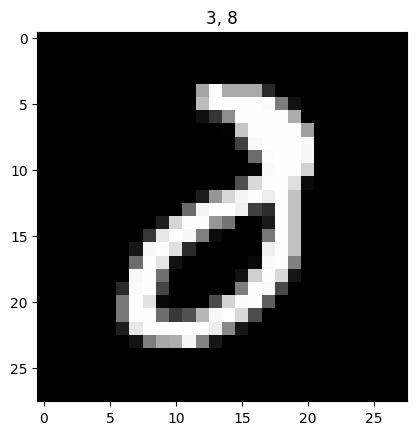

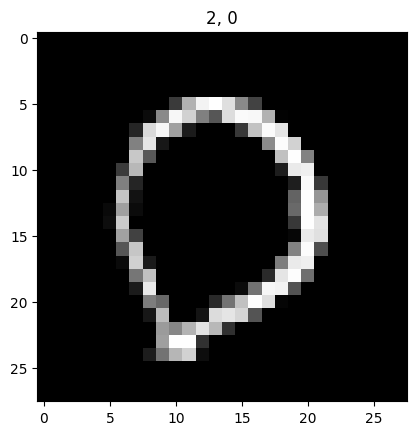

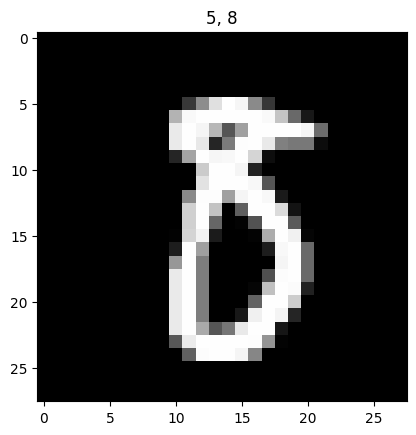

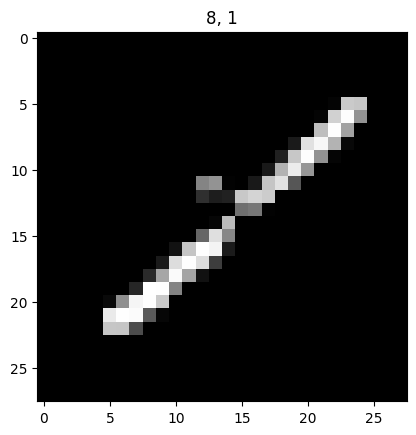

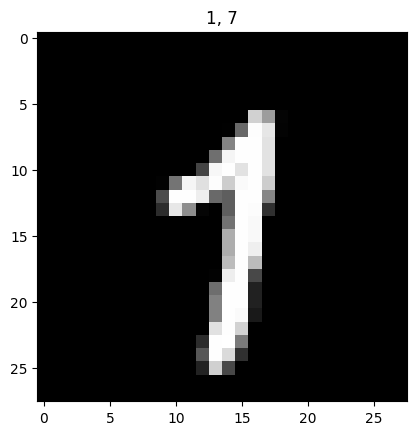

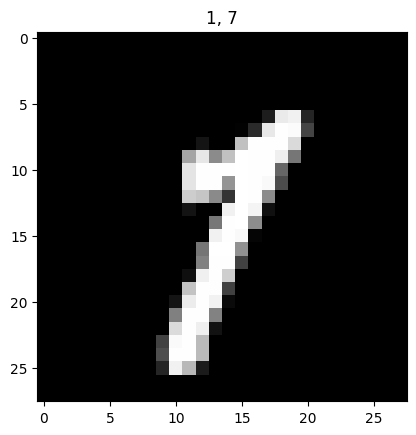

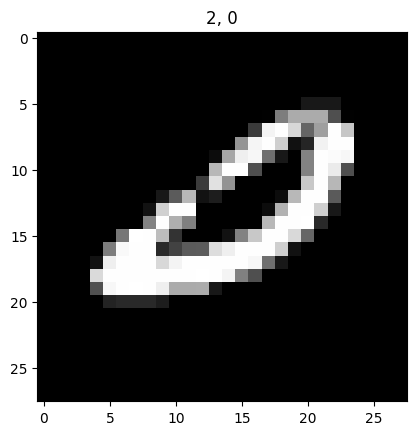

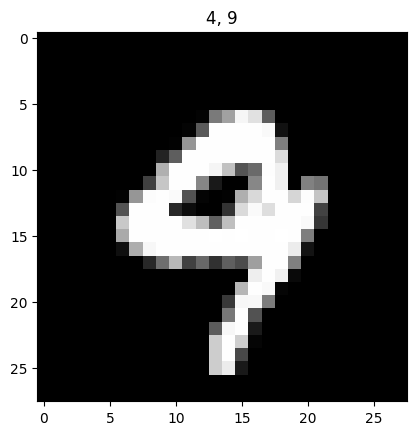

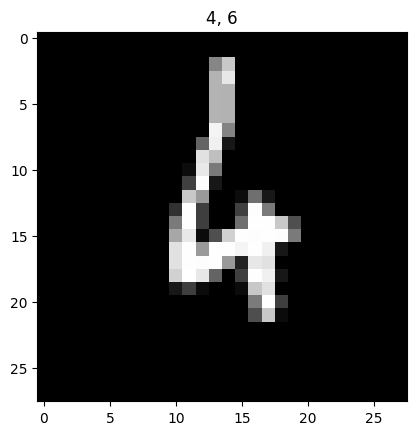

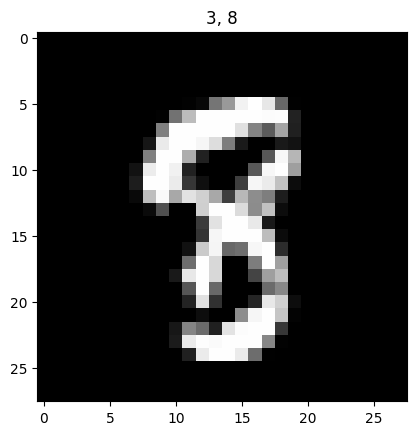

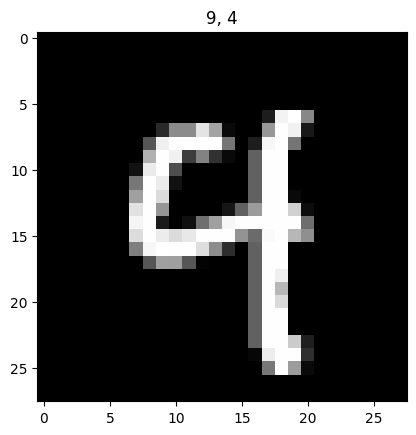

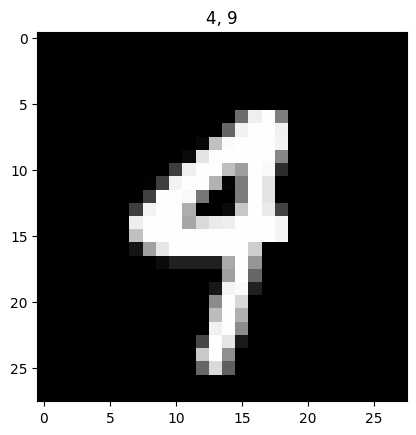

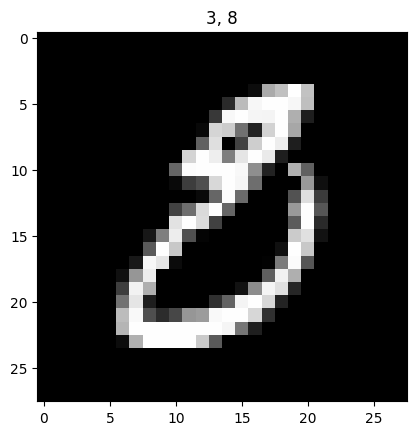

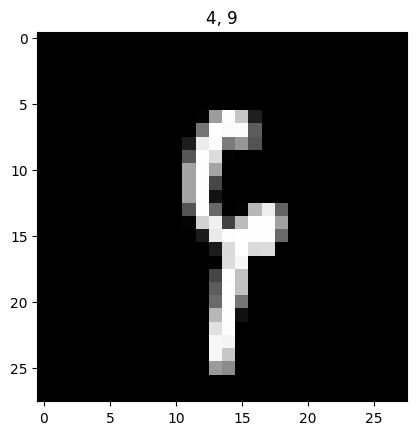

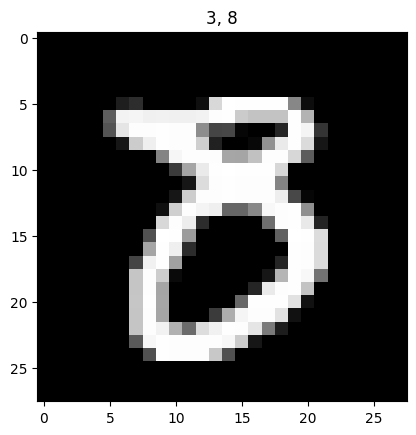

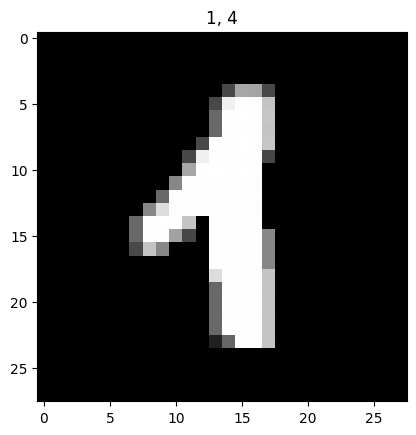

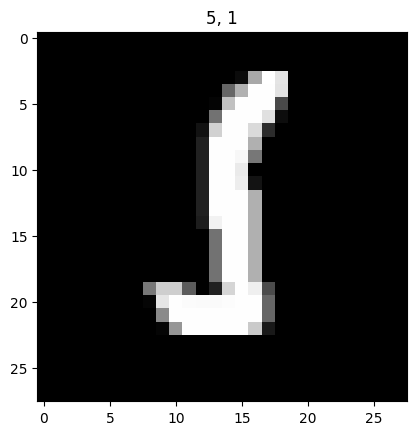

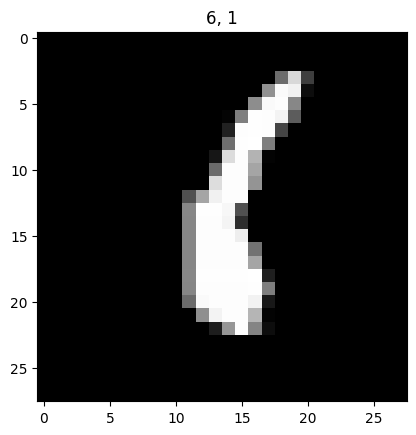

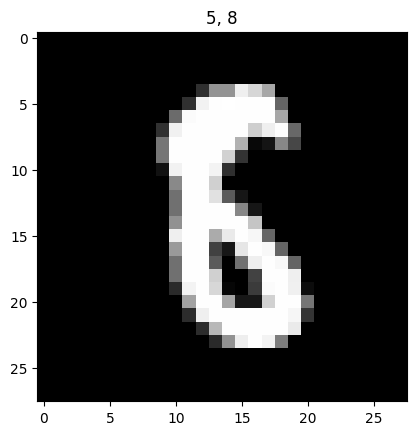

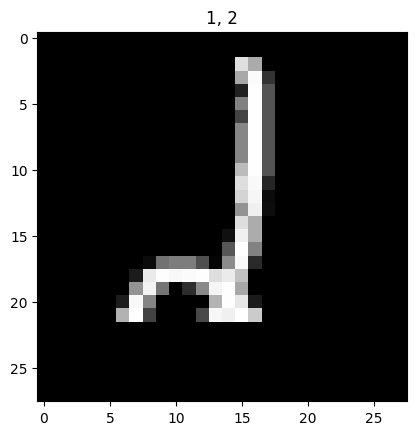

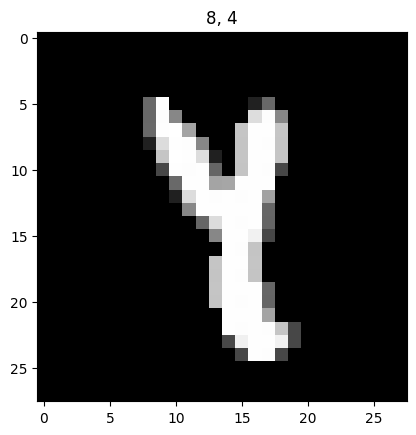

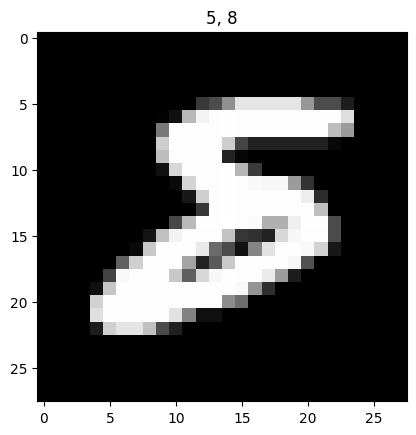

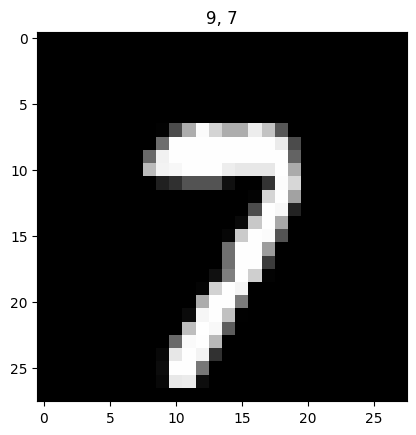

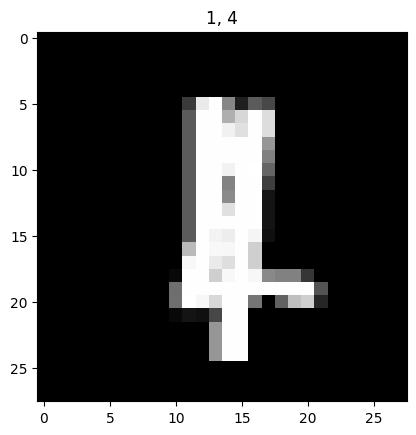

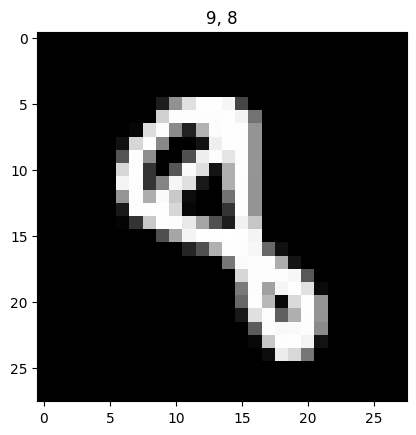

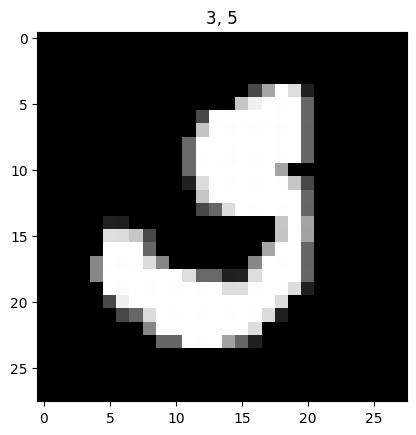

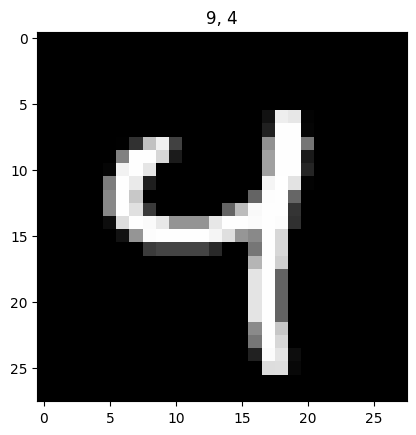

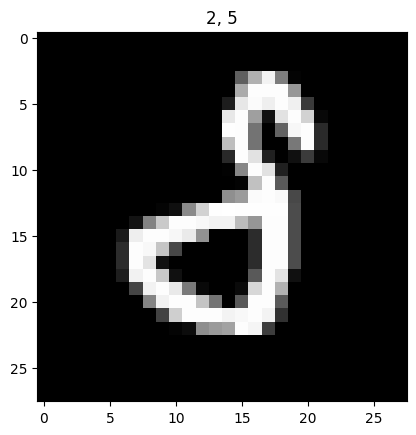

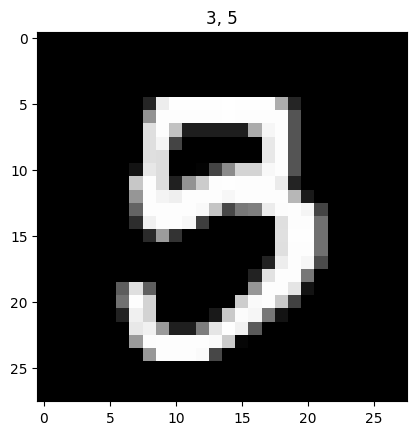

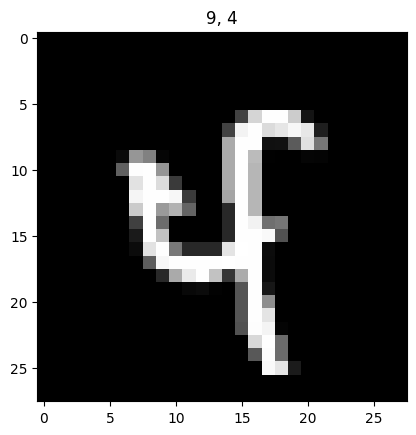

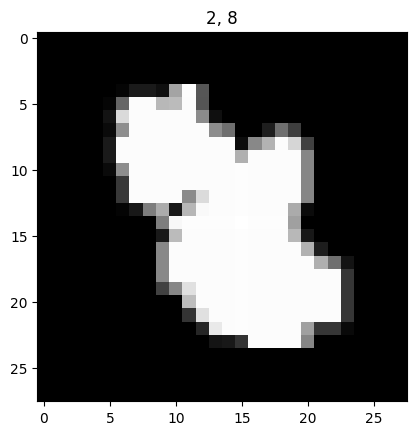

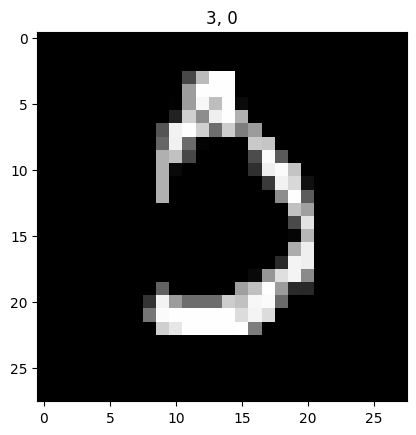

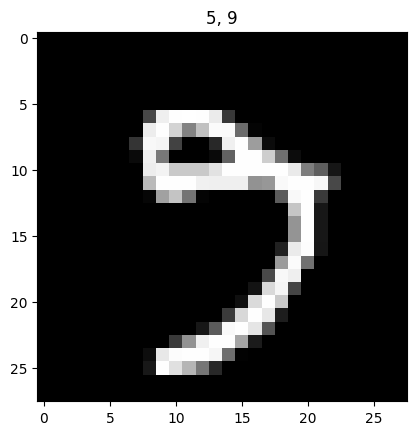

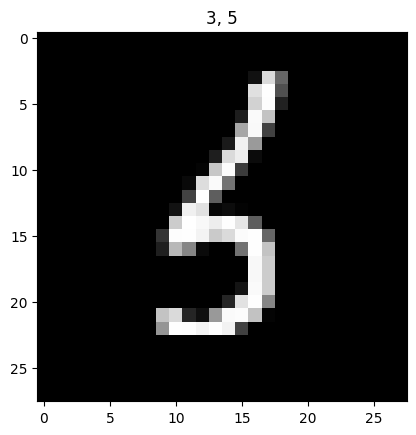

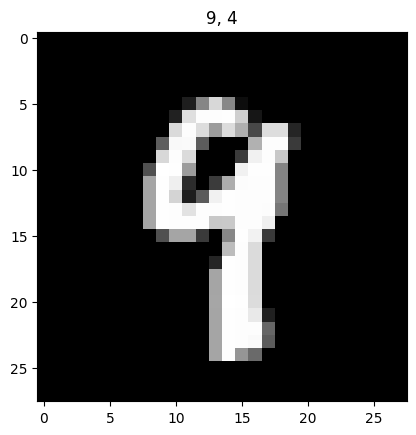

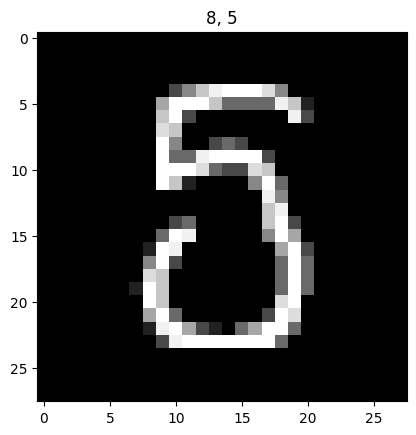

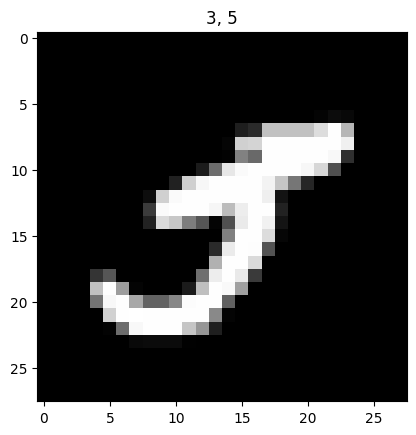

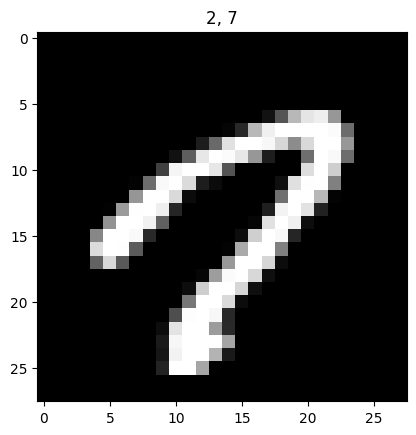

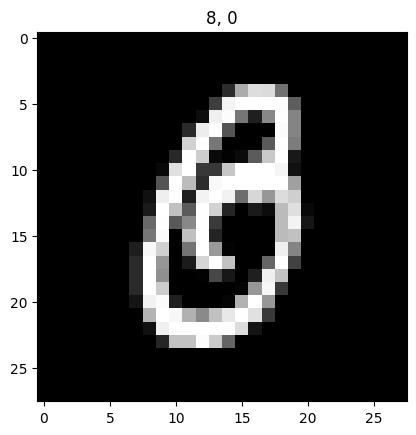

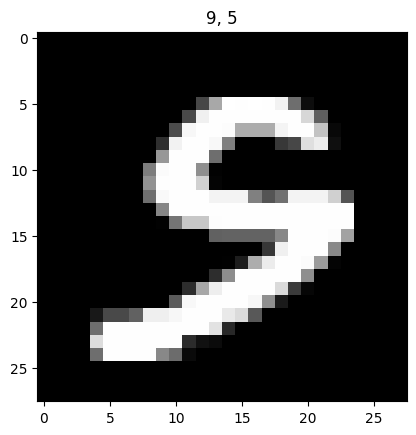

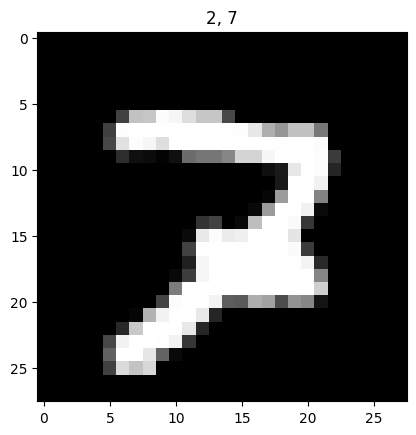

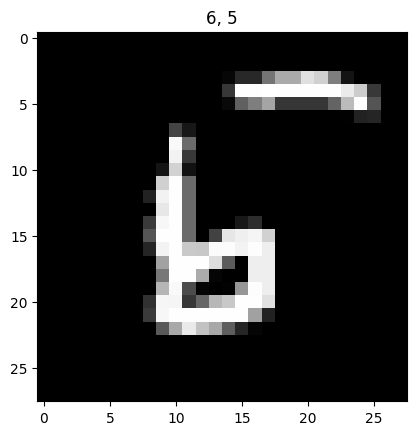

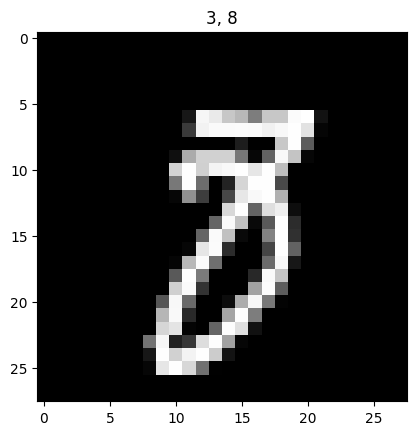

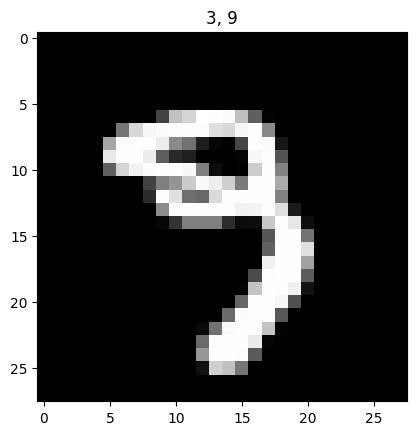

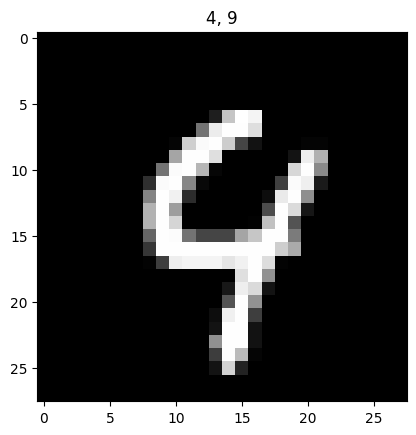

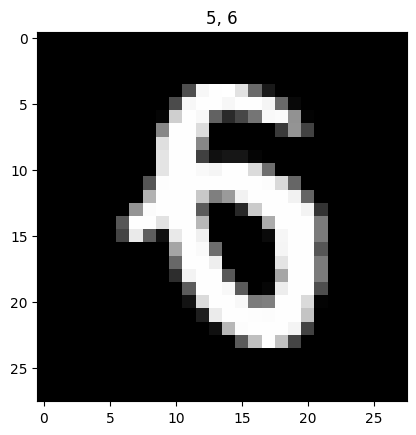

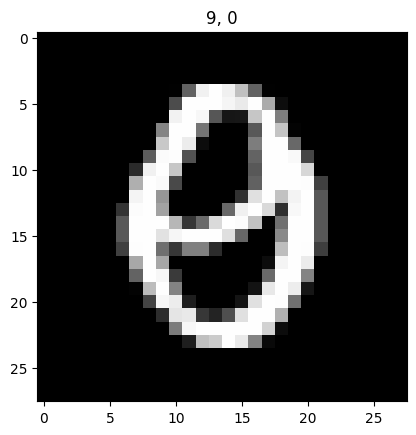

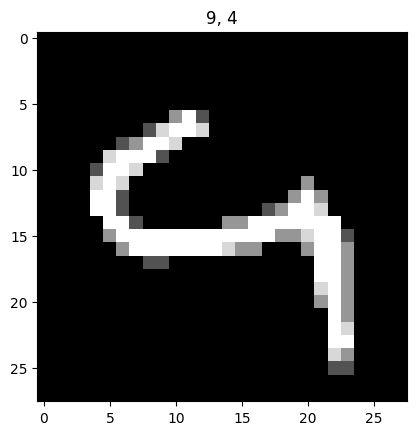

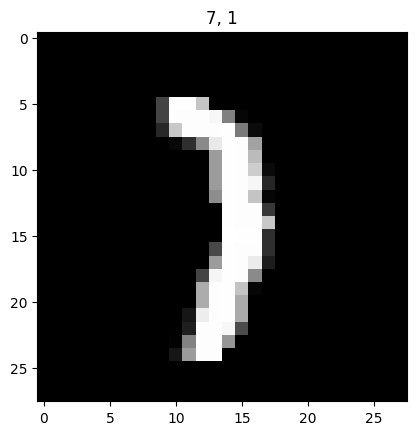

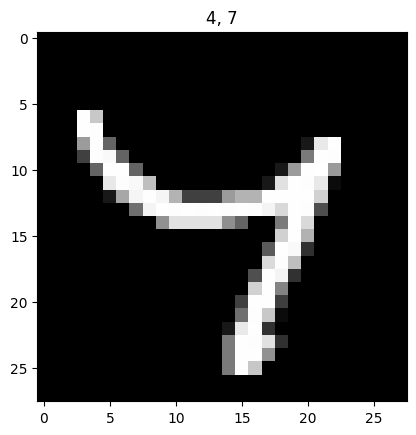

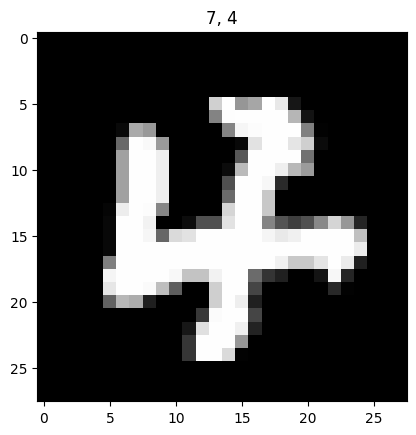

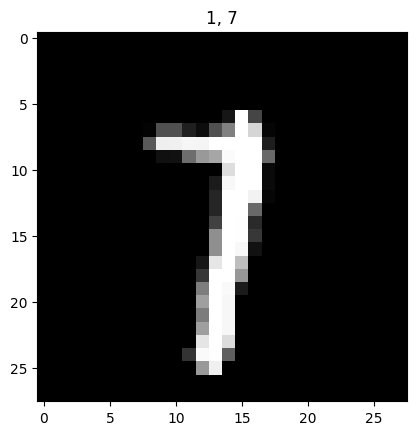

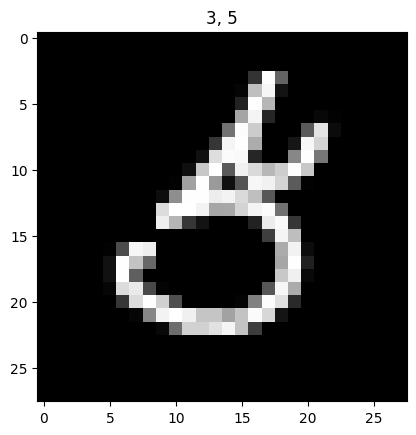

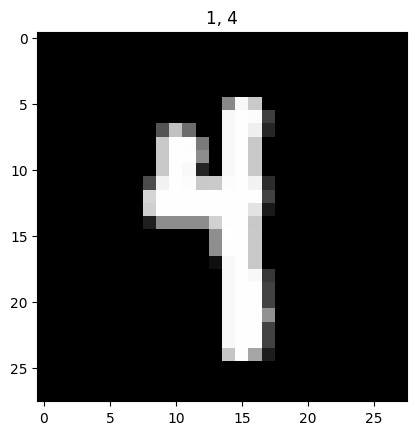

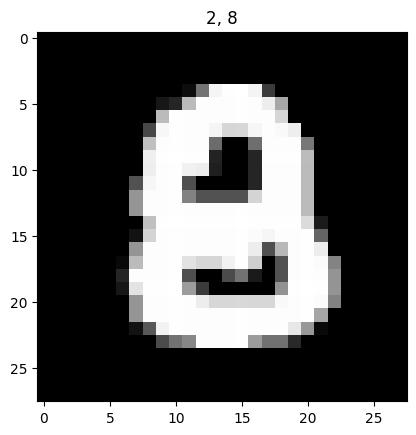

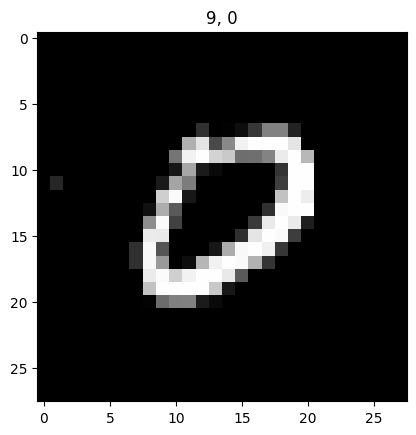

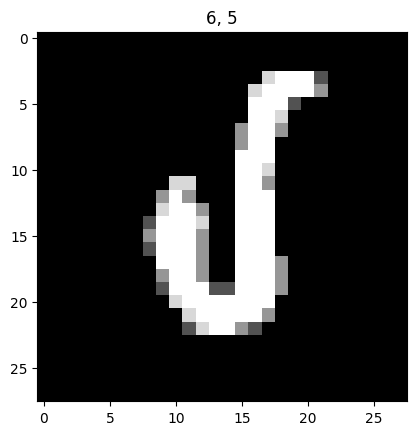

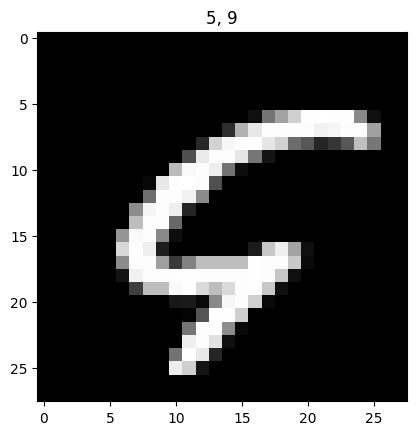

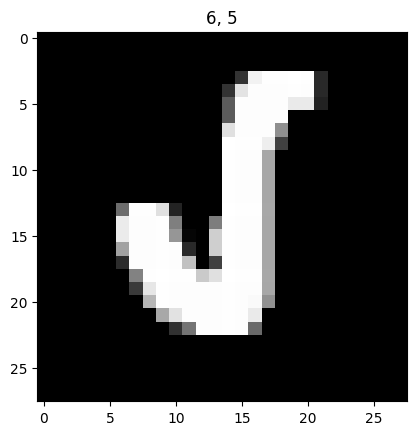

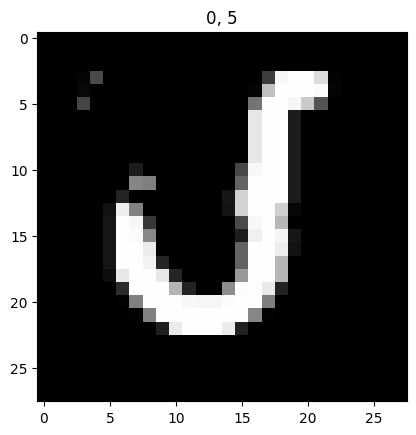

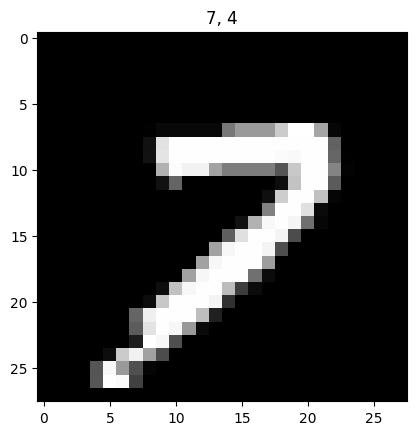

In [62]:
for i in 오답리스트:
    plt.title(f'{df.loc[i]["pred"]}, {df.loc[i]["ans"]}')
    plt.imshow(x_train[i], cmap="Greys_r")
    plt.show()

In [16]:
model.load_weights("./best_model_cnn.h5")

In [23]:
print(
    model.predict(x_train[0].reshape(1, 28, 28),
                  verbose=0).argmax(axis=1)[0]
)

5


In [25]:
import matplotlib.pyplot as plt



In [28]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

In [35]:
number = plt.imread("./8.png")
number = rgb2gray(number)
number = 1 - number
model.predict(number.reshape(1, 28, 28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([8])

In [36]:
# 데이터 증강 Data Augment

In [37]:
# LeNet by Yann LeCun

In [63]:
import keras

lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,
                        activation='tanh',
                        input_shape=x_train[0].shape, padding='same'),
    #C1
    keras.layers.MaxPooling2D(),  #S2
    keras.layers.Conv2D(16, kernel_size=5, 
                        strides=1, activation='tanh',
                        padding='valid'),  #C3
    keras.layers.MaxPooling2D(),  #S4
    keras.layers.Flatten(),  #Flatten
    keras.layers.Dense(120, activation='tanh'),  #C5
    keras.layers.Dense(84, activation='tanh'),  #F6
    keras.layers.Dense(10, activation='softmax')  #Output layer
])

ValueError: Input 0 of layer "conv2d_6" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)

In [40]:
lenet_5_model.compile(loss='categorical_crossentropy',
                      metrics=['accuracy'],
                      optimizer='RMSProp')

In [ ]:
lenet_5_model.fit(x_train, y_train, epochs=20)

In [ ]:
lenet_5_model.evaluate(x_test, y_test)

In [46]:
number = plt.imread("./8.png")
number = rgb2gray(number)
number = 1 - number
lenet_5_model.predict(number.reshape(1, 28, 28)).argmax(axis=1)

1/1 [==============================] - 0s 17ms/step


array([8])

1. 데이터 전처리
2. 모델 설계(Sequential)
3. 모델 컴파일(compile)
4. 모델 학습(fit)
5. 모델 평가(evaluate)
6. 모델 써먹기(predict)

<Optimizer>  학습을 보다 효율적으로 하기 위한,
             국부최소점을 지나칠 수 있는 기법.
SGD Stochastic Gradient Descent 경사하강법
momentum
1) 시작점을 잘 찾자. He, 
2) local minimum을 탈출하는 방법
RMSProp
**Adam


<ACTIVATION>
sigmoid = 1 / (1 + e^-x)  # 기울기소실(폭발)
tanh = (e^x - e^-x) / (e^x + e^-x) 
ReLU:  if x > 0: y = x
       else: y = 0
       y = max(0, x)
정보 손실
swish, leaky-relu, ....
 
<Loss>
MSE # 연속된 실수를 예측
sparse_caterical_crossentropy  # 분류:정답레이블이 정수 
categorical_crossentropy  # 분류
binary_crossentropy 

<Layer>
Flatten : (n, 1) 의 데이터로 펼쳐주는 층.
# Flatten 대신 array.reshape(784,) 

Dense  # MLP, Multi Layer Perceptron (w1x1 +...+w100x100 + b)
w1x1 + w2x2 + ... w784x784 + b
# Dense층의 용도는
# 1) w와 b를 학습하기 위한 레이어
# 2) 카테고리를 구분하기 위한 출력층(activation으로 softmax)

<softmax를 알아보자>
x0=0, x1=1, x2=3, x3=10, x4=100, 
x5=10, x6=50, x7=1, x8=0, x9=0
이 중에 어떤 게 답인가?
이 값들을 각각의 확률로 변환해보자.
x_x / sum(x)
# 큰 값에 더 큰 가중치를 주고,
# 작은 값은 더 작게 해서 확률을 구하고 싶음.
softmax의 식 : e^xn / (e^x0 + e^x1 + ... + e^x9)



Conv2D  # 
AveragePooling  # 평균값
MaxPooling  # 4개 픽셀의 최대값을 추출해서, 1개 픽셀로.

<Metric>
accuracy
loss

<Etc.>
fit
epoch
alpha

In [59]:
# Dense층 3개 레이어에 각각 50개의 유닛이 있을 때
# 파라미터 갯수?

784 * 150 + 150

# Conv2D 장점 두 가지
# 1. 이미지 인식에 대한 성능이 높다! (위치정보 기억)
# 2. 파라미터 갯수가 적다! (동일성능 대비 현저하게~)

117750

In [58]:
lenet_5_model.predict(x_train[0].reshape(1,28,28))

1/1 [==============================] - 0s 25ms/step


array([[1.0326454e-12, 2.2897059e-11, 1.9480502e-11, 5.9434044e-01,
        1.2047109e-12, 4.0565839e-01, 3.1633793e-11, 4.8265867e-11,
        1.8096499e-10, 1.1924394e-06]], dtype=float32)

In [56]:
y_train[0].argmax()

5

In [47]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [50]:
y_train[0]

5

In [51]:
y_train = keras.utils.to_categorical(y_train, 10)

In [52]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# SOTA
# State-Of-The-Art  # 현 시대 최고 점수의 모델

In [64]:
# 알고리듬 algorithm

In [ ]:
# 음성인식 STT (Speech to Text) & TTS  
# 객체탐지 (이미지에서 특정 객체 라벨링하기, YoloV8)
# 인스턴스 세그멘테이션(Detectron2)
# 시계열 예측
# 텍스트 분류, 예측(기본적인 언어모델)
# 챗봇. ChatGPT를 끌어다가 만드는 챗봇
# 챗봇advanced : 사규나 법령을 학습시키고, 
#                관련답변도 해주는 챗봇